In [5]:
import json 
from pathlib import Path
# Spx minutely data from Twelve Data
spx = json.load(Path("/Users/kamyarghiam/Desktop/kalshi_bot/src/data/local/research/minutely_spx_data.json").open())

In [9]:
data = spx['values']

In [10]:
from datetime import datetime

times = []
prices = []
for point in data:
    datetime_obj = datetime.strptime(point['datetime'], '%Y-%m-%d %H:%M:%S').timestamp()
    times.append(datetime_obj)
    price = float(point['open'])
    prices.append(price)

In [11]:
from data.coledb.coledb import ColeDBInterface


db = ColeDBInterface()
df = db.read_bbo_df("INX-24MAY01-B5037")

In [14]:
df = df.dropna()

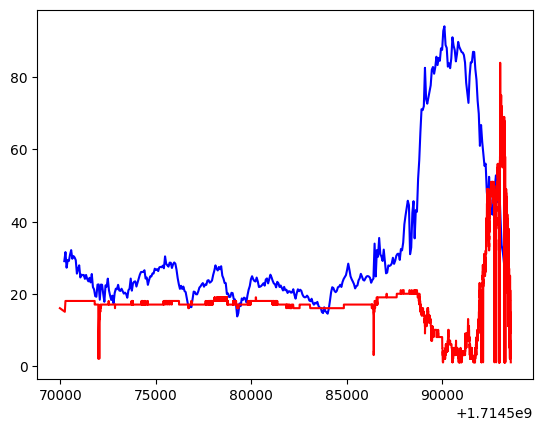

In [22]:
import matplotlib.pyplot as plt 
prices_normalized = [x - 5000 for x in prices]
plt.plot(times, prices_normalized, color = "blue")
plt.plot(df.ts, df.yes_bid_price, color = "red")